## Tugas

Buatlah sebuah model KMeans dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model KMeans dengan mempertimbangkan jumlah $k$ yang terbaik.

# Identitas

NIM: 2041720183

Nama: Satria Alief Pratama Sofyan

Kelas: TI-3A

In [33]:
import os, warnings
warnings.filterwarnings("ignore")
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv('data/Mall_Customers.csv')
df.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"}, inplace=True)
print("Terdapat {:,} data observasi dan {} kolom di dataset Mall Customer.".format(df.shape[0], df.shape[1]))
print("Terdapat {} nilai yang hilang.".format(df.isna().sum().sum()))
df.head()

Terdapat 200 data observasi dan 5 kolom di dataset Mall Customer.
Terdapat 0 nilai yang hilang.


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.drop('CustomerID', axis=1, inplace=True)
pd.DataFrame(df.describe())

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [36]:
df['Gender'] = ['Women' if i == 'Female' else 'Men' for i in df.Gender]
pd.DataFrame(df.select_dtypes('object').describe().T).style.set_caption("Summary Statistics of Categorical Variables")

,count,unique,top,freq
Gender,200,2,Women,112


In [37]:
from sklearn.preprocessing import LabelEncoder


lenc=LabelEncoder()
df['Gender']=lenc.fit_transform(df['Gender'])

In [38]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [39]:
X = df
y = df.iloc[:, 0]

X.head()

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


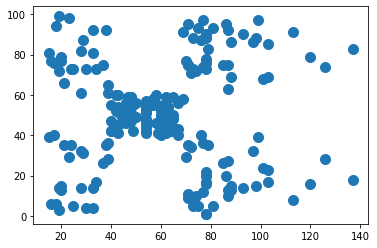

In [40]:
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], s = 100)

In [41]:
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=2)

y_kmeans = cl_kmeans.fit_predict(X)


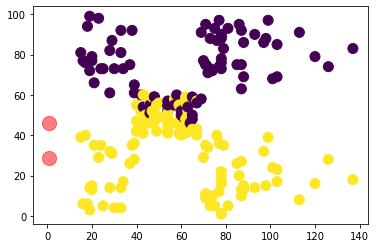

In [42]:
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], s = 100, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [43]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 212889.442455243


In [44]:
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))

In [45]:
clust_df = df.copy()
clust_df['Gender'] = [1 if i == "Women" else 0 for i in clust_df.Gender]

k_means = list()
for clust in range(1,16):
    km = KMeans(n_clusters=clust, init='k-means++', random_state=21).fit(clust_df)
    k_means.append(pd.Series({'Clusters': clust, 
                              'Inertia': km.inertia_,
                              'model': km}))

plot_km = (pd.concat(k_means, axis=1).T
           [['Clusters','Inertia']]
           .set_index('Clusters'))

fig = px.line(plot_km, x=plot_km.index, y='Inertia', markers=True)
fig.add_vline(x=5, line_width=3, line_dash="dash", line_color="darkgrey")
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=.31,
    y=75e3,
    text="Optimal Number of Clusters",
    axref="x domain",
    ayref="y",
    ax=.43,
    ay=12e4,
    arrowhead=2, 
    bordercolor="#585858",
    borderpad=4, 
    bgcolor='white',
    font=dict(size=14)
)
fig.update_traces(line_color='#518C89')
fig.update_layout(template=temp, title="K-Means Clustering Elbow Curve", 
                  xaxis=dict(tickmode = 'linear', showline=True), yaxis=dict(showline=True), width=700)
fig.show()

In [46]:
sse = []

K = range(1,16)

for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

In [47]:
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=308862.06
k=2; SSE=212889.442455243
k=3; SSE=143391.59236035674
k=4; SSE=104414.67534220166
k=5; SSE=75421.38291301335
k=6; SSE=58348.64136331505
k=7; SSE=51130.69008126376
k=8; SSE=44389.807673557676
k=9; SSE=40857.186675020894
k=10; SSE=37741.054784689004
k=11; SSE=35267.8336026936
k=12; SSE=32843.72830530982
k=13; SSE=29878.95591589783
k=14; SSE=27895.41603982832
k=15; SSE=26379.5536990787


In [48]:
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(clust_df)
plot_km=clust_df.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

fig = px.scatter(plot_km, x="Spending Score", y="Annual Income", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Customer Spending vs. Income", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Spending Score', showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $', ticksuffix='k', showline=True))
fig.show()